# 4: Centrality of hubs

###### Notebook to get centrality values of nodes within a given area (configure by editing place & network_type) and save them in a dataframe for future usage in other scripts.

### Setting up packages and variables

In [1]:
# Start writing In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import pandas as pd
import matplotlib.colors as colors

%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

# configure the place, network type
place = 'Binnenstad, Delft, Netherlands'
network_type = 'all'

miev_pink = '#f06675'
miev_blue = '#2c3174'
miev_yellow = '#fbe56d'

/root/venv/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


### Download network

In [2]:
# download the street network with inner city + 1km buffer
G = ox.graph_from_place(place, network_type, buffer_dist=1000)

# get betweenness value for all nodes in G
df = nx.betweenness_centrality(G)

### Save values in dataframe

In [3]:
# pd.Series(df).to_frame()
df = pd.Series(df).to_frame('Centrality')
df = df.rename_axis('Node ID').reset_index()

# round values and export
df = df.round(decimals=3)
df.to_excel("data/centrality.xlsx")

### Plot

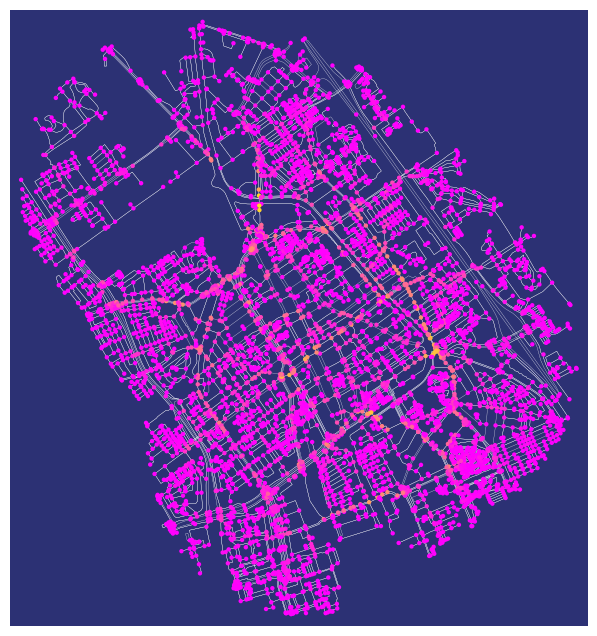

In [4]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]

# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="spring")
fig, ax = ox.plot_graph( G, filepath='data/centrality.png', bgcolor= miev_blue, node_color=nc, node_size=10, node_zorder=2,
    edge_linewidth=0.2, edge_color="w")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8966f7b1-6d03-4f20-86ea-afcd52732bbc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>